### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
movie_ratings = pd.read_csv("Data.csv")
print(movie_ratings)

       user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]


In [3]:
movie_genre = pd.read_csv("item.csv")
print(movie_genre)

      movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Fantasy 

In [4]:
movie_audience = pd.read_csv("user.csv")
print(movie_audience)

     user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
movie_ratings.shape

(100000, 4)

In [7]:
movie_ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
movie_ratings.isnull().values.any()

False

In [9]:
movie_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
movie_genre.shape

(1681, 22)

In [11]:
movie_genre.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
movie_genre.isnull().values.any()

False

In [13]:
movie_audience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [14]:
movie_audience.shape

(943, 5)

In [15]:
movie_audience.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [16]:
movie_audience.isnull().values.any()

False

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [17]:
# use sum on the default axis
#print(movie_genre)

In [18]:
# Determine all the movie genres and extract them into a list
genres = movie_genre.columns.values.tolist()
#print(genres)
del genres[:3]
print(genres)

['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [19]:
# Count the number of movies in each genre 
genre_counts = []
for genre in genres: 
    count = movie_genre[genre].eq(1).sum()
    #print(movie_genre[genre].value_counts())
    #print(count)
    genre_counts.append(count)
    #print("Genre:"+genre+" Count:"+str(count))

genre_stats = pd.DataFrame(list(zip(genres, genre_counts)), 
               columns =['Genre', 'Count']) 
print(genre_stats)

          Genre  Count
0       unknown      1
1        Action    251
2     Adventure    135
3     Animation     42
4     Childrens    122
5        Comedy    505
6         Crime    109
7   Documentary     50
8         Drama    725
9       Fantasy     22
10    Film-Noir     24
11       Horror     92
12      Musical     56
13      Mystery     61
14      Romance    247
15       Sci-Fi    101
16     Thriller    251
17          War     71
18      Western     27


#### 5. Find the movies that have more than one genre - 5 marks

In [20]:
#hint: use sum on the axis = 1
titles = []
genre_cts = []
row_total = movie_genre[genres].sum(axis=1)
#print(row_total)
#print(len(row_total))
for r in range(len(row_total)):
    #print("Genre Count for Row"+str(r)+":"+str(row_total[r]))
    if (row_total[r] > 1):
        #print("Movie Title: "+movie_genre.iloc[r,1])
        titles.append(movie_genre.iloc[r,1])
        #print("Genre Count:"+str(row_total[r]))
        genre_cts.append(row_total[r])

multi_genre_stats = pd.DataFrame(list(zip(titles, genre_cts)), 
               columns =['Title', 'Genres']) 
print(multi_genre_stats)

                  Title  Genres
0            Toy Story        3
1            GoldenEye        3
2           Get Shorty        3
3              Copycat        3
4       Twelve Monkeys        2
..                  ...     ...
844  MURDER and murder        3
845            Tainted        2
846             Mirage        2
847          B. Monkey        2
848      Sliding Doors        2

[849 rows x 2 columns]


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [21]:
movie_genre.drop(movie_genre[movie_genre['unknown'] == 1].index, inplace = True)
print(movie_genre.shape)
#print(movie_genre)

(1680, 22)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

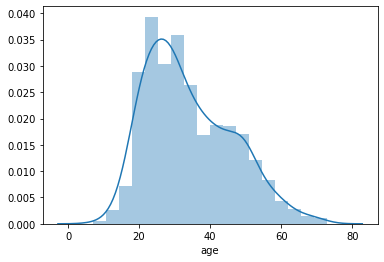

In [22]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.
#print(movie_audience)
sns.distplot(movie_audience['age']);

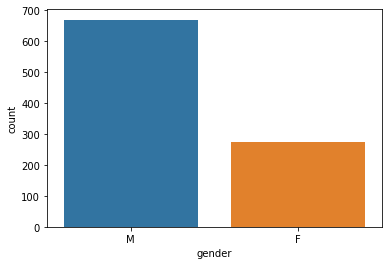

In [23]:
sns.countplot(x=movie_audience['gender']);

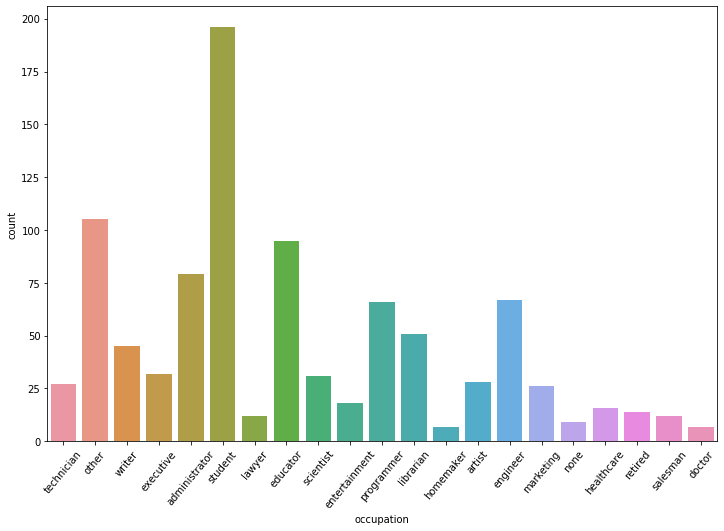

In [24]:
plt.figure(figsize=(12,8))
oc_plot = sns.countplot(x=movie_audience['occupation']);
oc_plot.set_xticklabels(oc_plot.get_xticklabels(), rotation=50);

       user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]


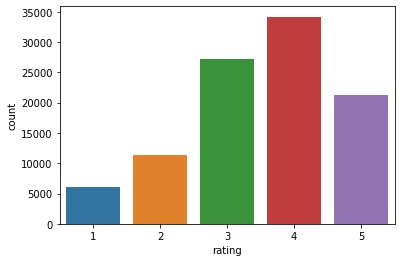

In [25]:
print(movie_ratings)
sns.countplot(x=movie_ratings['rating']);

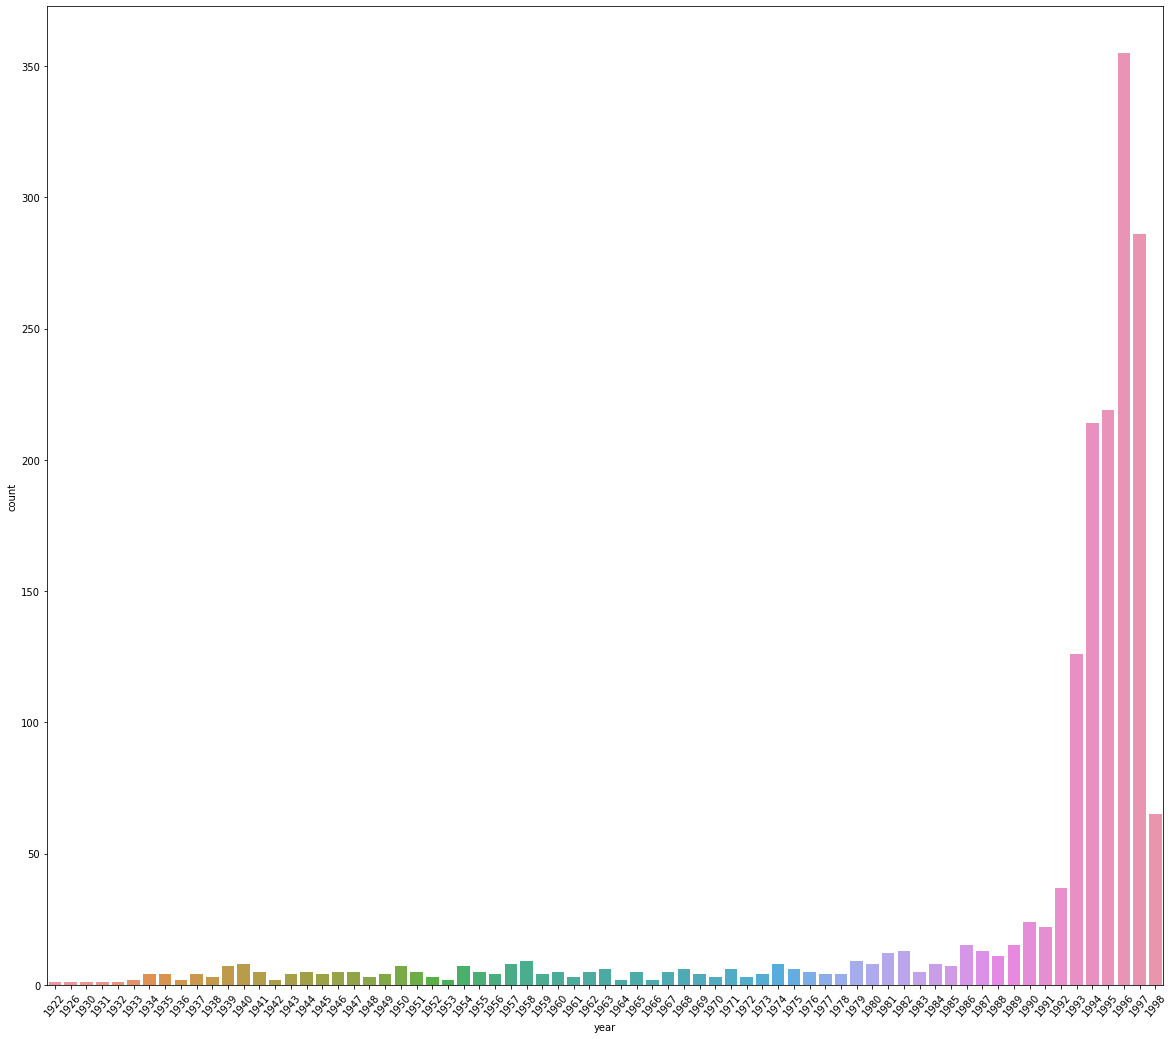

In [26]:
rel_year = []
#print(movie_genre)
for date in movie_genre['release date']:
    rel_date = datetime.datetime.strptime(date, "%d-%b-%Y")
    rel_year.append(rel_date.year)
#print(rel_year)

# Adding the year extracted from release date as a new column to the dataframe
movie_genre['release year'] = rel_year

plt.figure(figsize=(20,18))
year_plot = sns.countplot(x=rel_year);
year_plot.set(xlabel="year");
year_plot.set_xticklabels(year_plot.get_xticklabels(), rotation=50);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
              Action  Adventure  Animation  Childrens  Comedy  Crime  \
release year                                                           
1922               0          0          0          0       0      0   
1926               0          0          0          0       0      0   
1930               0          0          0          0       0      0   
1931               0          0          0          0       0      1   
1932               0          0          0          0       0      0   
...              ...        ...        ...        ...     ...    ...   
1994              30         13          4         15      82      8   
1995              40         22          6         21      63     11   
1996              44         24          9         21     108     21   
1997    

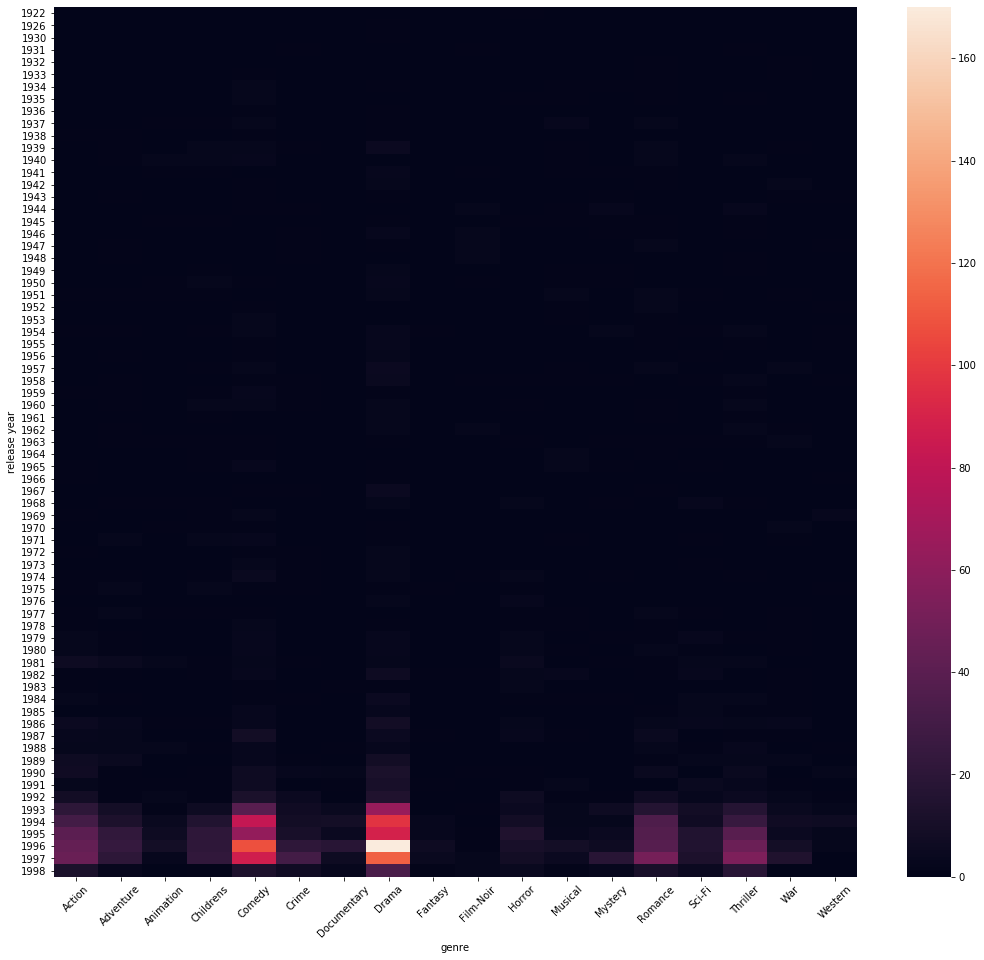

In [27]:
#print(movie_genre)
genre_year_df = pd.DataFrame()

# Removing the genre "unknown" from the list of genres of movies
del genres[:1]
print(genres)

# Groupby the movie release year and genre, do a sum() to find out the nuumber of releases in a year/genre.
for genre in genres: 
    movie_genre_year = movie_genre.groupby('release year')[[genre]].sum()
    #print(movie_genre_year)
    genre_year_df = pd.concat([genre_year_df,movie_genre_year],axis=1, ignore_index=True)
    #genre_year_df = genre_year_df.append(movie_genre_year)
genre_year_df.columns = genres
print(genre_year_df)
fig, ax = plt.subplots(figsize=(18,16))

# HeatMap
heat_map = sns.heatmap(genre_year_df);
heat_map.set(xlabel="genre");
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [28]:
movie_id_list = []
#print(movie_ratings.shape)
#print(movie_genre.shape)

#Combine the two dataframes, the dataframe with movie ratings and the one with movie genres with an inner join 
movie_merged = pd.merge(movie_ratings, movie_genre, on='movie id', how='inner')
print(movie_merged.shape)
#print(movie_merged)

# Count the number of ratings per each movie and generate a new dataframe (from the above combined dataframe) 
ratings_count_df = movie_merged.groupby('movie id')['rating'].count().reset_index(name='ratings_count')
#print(ratings_count_df)

# Extract the movie ids of movies that have more than 100 ratings in a list
#movie_id_list = ratings_count_df[ratings_count_df['ratings_count']>100]['movie id'].values
movie_id_list = ratings_count_df[ratings_count_df['ratings_count']>100]
#print(movie_id_list)

# Find the average rating of all the movies
average_ratings_df = movie_merged.groupby('movie id')['rating'].mean().reset_index(name='average_rating')
#print(average_ratings_df)

# Sort them in the descending order
average_ratings_df.sort_values(by=['average_rating'], inplace=True, ascending=False)
#print(average_ratings_df)
movies_100_ratings = pd.merge(average_ratings_df, movie_id_list, on='movie id', how='inner')
#print(movies_100_ratings)

# Determine the top 25 movies
top25_movies_100_ratings = movies_100_ratings.loc[movies_100_ratings.index < 25]
#print(top25_movies_100_ratings)

# Using the movie ids of the top 25 movies extract the movie title and release date from the earlier merged dataframe and display them all together
movie_titles = []
release_dates = []
for id in top25_movies_100_ratings['movie id']: 
    row = movie_merged.loc[movie_merged['movie id'] == id, ["movie title", "release date"]]
    #print(row)
    title = str(row['movie title'].unique()).replace("['", "").replace('["', '').replace("']", "").replace('"]', '')
    date = str(row['release date'].unique()).replace("['", "").replace("']", "")
    #print(title)
    #print(date)
    movie_titles.append(title)
    release_dates.append(date)

top25_movies_100_ratings['movie title'] = movie_titles
top25_movies_100_ratings['release date'] = release_dates
top25_movies_100_ratings = top25_movies_100_ratings[['movie id', 'movie title', 'release date', 'average_rating', 'ratings_count']]
print(top25_movies_100_ratings)

(99990, 26)
    movie id                                        movie title release date  \
0        408                                    Close Shave, A   28-Apr-1996   
1        318                                  Schindler's List   01-Jan-1993   
2        169                               Wrong Trousers, The   01-Jan-1993   
3        483                                        Casablanca   01-Jan-1942   
4         64                         Shawshank Redemption, The   01-Jan-1994   
5        603                                       Rear Window   01-Jan-1954   
6         12                               Usual Suspects, The   14-Aug-1995   
7         50                                         Star Wars   01-Jan-1977   
8        178                                      12 Angry Men   01-Jan-1957   
9        134                                      Citizen Kane   01-Jan-1941   
10       427                             To Kill a Mockingbird   01-Jan-1962   
11       357                

/Users/harinirao/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/harinirao/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [29]:
#print(movie_genre)
#print(movie_audience)
#print(movie_ratings)

In [30]:
# Combine all the three movie dataframes 
movie_combined = pd.merge(movie_genre, movie_ratings, on='movie id', how='inner')
movie_combined = pd.merge(movie_combined, movie_audience, on='user id', how='inner')
print(movie_combined.shape)
#print(movie_combined)

(99990, 30)


In [31]:
# Group by gender and rating to determinge the distribution of movie ratings by gender
gender_ratings_df = movie_combined.groupby('gender')['rating'].count().reset_index(name='ratings_count')
print(gender_ratings_df)

# Generate two seperate dataframes from the above dataframe, one for male and the other for female
male_ratings_df = movie_combined.loc[movie_combined['gender'] == 'M']
#print(male_ratings_df)
female_ratings_df = movie_combined.loc[movie_combined['gender'] == 'F']
#print(female_ratings_df)

  gender  ratings_count
0      F          25738
1      M          74252


In [32]:
# Determine the number of movie ratings and calculate the percentages of ratings, per movie genre for male gender
genre_counts_male = []
count = 0
for genre in genres: 
        count = male_ratings_df[genre].eq(1).sum()
        #print(male_ratings_df[genre].value_counts())
        #print(count)
        ratings_percent = (count/len(male_ratings_df)) * 100
        #print(ratings_percent)
        genre_counts_male.append(ratings_percent)
        #print("Genre:"+genre+" ratings:"+str(ratings_percent))

In [33]:
# Determine the number of movie ratings and calculate the percentages of ratings, per movie genre for female gender
genre_counts_female = []
count = 0
for genre in genres: 
        count = female_ratings_df[genre].eq(1).sum()
        #print(female_ratings_df[genre].value_counts())
        #print(count)
        ratings_percent = (count/len(female_ratings_df)) * 100
        #print(ratings_percent)
        genre_counts_female.append(ratings_percent)
        #print("Genre:"+genre+" Count:"+str(ratings_percent))

In [34]:
# Combine the percentages of movie ratings per genre for both the genders
genre_combined_stats = pd.DataFrame(list(zip(genres, genre_counts_male,genre_counts_female)), 
               columns =['Genre', 'Male_Ratings(%)', 'Female_Ratings(%)']) 
print(genre_combined_stats)

          Genre  Male_Ratings(%)  Female_Ratings(%)
0        Action        27.133276          21.143834
1     Adventure        14.291871          12.203745
2     Animation         3.515057           3.865879
3     Childrens         6.666487           8.672002
4        Comedy        29.310995          31.346647
5         Crime         8.432096           6.970239
6   Documentary         0.769003           0.726552
7         Drama        38.904003          42.769446
8       Fantasy         1.331951           1.410366
9     Film-Noir         1.815439           1.495843
10       Horror         5.548672           4.650711
11      Musical         4.729839           5.602611
12      Mystery         5.294133           5.105292
13      Romance        18.320045          22.760121
14       Sci-Fi        13.603674          10.214469
15     Thriller        22.606798          19.760665
16          War         9.708829           8.504934
17      Western         1.997253           1.441448


In [35]:
# Display the ratings distribution for both genders for Drama,Sci-Fi and Romance movie genres
print("Rating distribution for " +str(genre_combined_stats.iloc[7]))
print("Rating distribution for " +str(genre_combined_stats.iloc[14]))
print("Rating distribution for " +str(genre_combined_stats.iloc[13]))

Rating distribution for Genre                  Drama
Male_Ratings(%)       38.904
Female_Ratings(%)    42.7694
Name: 7, dtype: object
Rating distribution for Genre                 Sci-Fi
Male_Ratings(%)      13.6037
Female_Ratings(%)    10.2145
Name: 14, dtype: object
Rating distribution for Genre                Romance
Male_Ratings(%)        18.32
Female_Ratings(%)    22.7601
Name: 13, dtype: object


#### Conclusion:

It can be observed from the dataframe that the hypothesis made above are not entirely correct and 
* Women watch more drama than men
* Men watch more Sci-Fi than women
* Women watch more Romance than men